# ***SAMUEL MAINA                                            :BCS-05-0407/2022**

**##CAT 2 DATA SCIENCE**

## **Training a model To predict students likely to enroll in a specific program and identify those who may need additional support to graduate.**

# **Beggining of the process**

# **Importing all libralies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# **Step 1: Generate Synthetic Data**

In [2]:
np.random.seed(42)
n_samples = 1000

## **Simulating the features features of the data**

In [3]:
data = {
    "GPA": np.random.uniform(2.0, 4.0, n_samples),
    "Test_Scores": np.random.randint(800, 1600, n_samples),
    "Attendance_Rate": np.random.uniform(50, 100, n_samples),
    "Extracurricular_Activity": np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4]),
    "First_Gen_College": np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3]),
    "Socioeconomic_Status": np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5]),
    "Engagement_Score": np.random.uniform(0, 1, n_samples),
    "Enrolled": np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3]),  # Target 1
    "Graduated": np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])  # Target 2
}

In [4]:
df = pd.DataFrame(data)

In [5]:
df

,GPA,Test_Scores,Attendance_Rate,Extracurricular_Activity,First_Gen_College,Socioeconomic_Status,Engagement_Score,Enrolled,Graduated
0,2.749080,811,67.316088,0,1,0,0.693863,0,1
1,3.901429,1117,61.952767,0,0,1,0.305814,0,0
2,3.463988,1391,75.486212,0,0,1,0.759239,0,0
3,3.197317,1015,91.264305,1,0,1,0.619748,0,1
4,2.312037,1138,63.985177,0,0,0,0.077412,1,0
...,...,...,...,...,...,...,...,...,...
995,2.183164,913,55.548876,1,0,1,0.430941,1,1
996,3.834627,1548,81.721207,0,1,1,0.198003,0,1
997,2.273637,1377,88.539031,1,1,1,0.438022,1,1
998,3.900475,1160,50.144063,0,0,1,0.408744,0,0


## **Defining the Features and Target**

In [6]:
features = ["GPA", "Test_Scores", "Attendance_Rate", "Extracurricular_Activity",
            "First_Gen_College", "Socioeconomic_Status", "Engagement_Score"]

In [8]:

target_enrollment = "Enrolled"
target_graduation = "Graduated"

## **Spliting the Data into Training and Testing Sets**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target_enrollment], test_size=0.3, random_state=42
)


# **Model Training:Random Forest Classifier**

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Evaluating The Model**

In [11]:
y_pred = model.predict(X_test)
print("Classification Report (Enrollment):\n", classification_report(y_test, y_pred))
print("Accuracy Score (Enrollment):", accuracy_score(y_test, y_pred))

Classification Report (Enrollment):
               precision    recall  f1-score   support

           0       0.68      0.87      0.76       208
           1       0.22      0.09      0.12        92

    accuracy                           0.63       300
   macro avg       0.45      0.48      0.44       300
weighted avg       0.54      0.63      0.57       300

Accuracy Score (Enrollment): 0.6266666666666667


# **Featuring Important Visualization**

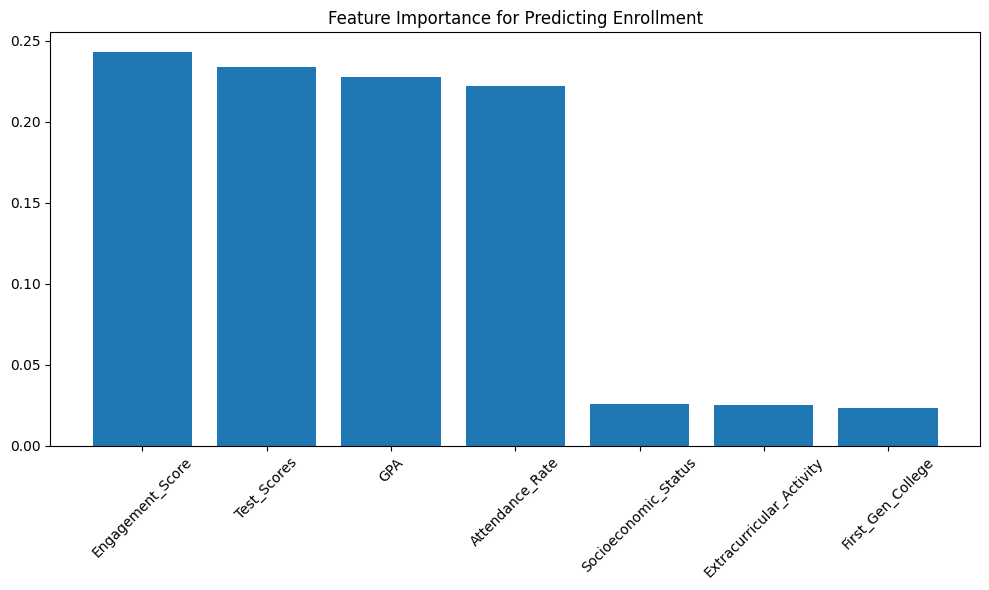

In [12]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Predicting Enrollment")
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in sorted_indices], rotation=45)
plt.tight_layout()
plt.show()

## ***Predicting Graduation***

In [13]:
X_train_grad, X_test_grad, y_train_grad, y_test_grad = train_test_split(
    df[features], df[target_graduation], test_size=0.3, random_state=42
)
model_grad = RandomForestClassifier(n_estimators=100, random_state=42)
model_grad.fit(X_train_grad, y_train_grad)
y_pred_grad = model_grad.predict(X_test_grad)

print("\nClassification Report (Graduation):\n", classification_report(y_test_grad, y_pred_grad))
print("Accuracy Score (Graduation):", accuracy_score(y_test_grad, y_pred_grad))



Classification Report (Graduation):
               precision    recall  f1-score   support

           0       0.57      0.62      0.59       186
           1       0.28      0.25      0.26       114

    accuracy                           0.48       300
   macro avg       0.43      0.43      0.43       300
weighted avg       0.46      0.48      0.47       300

Accuracy Score (Graduation): 0.4766666666666667


## **Graduation Prediction Visualization**

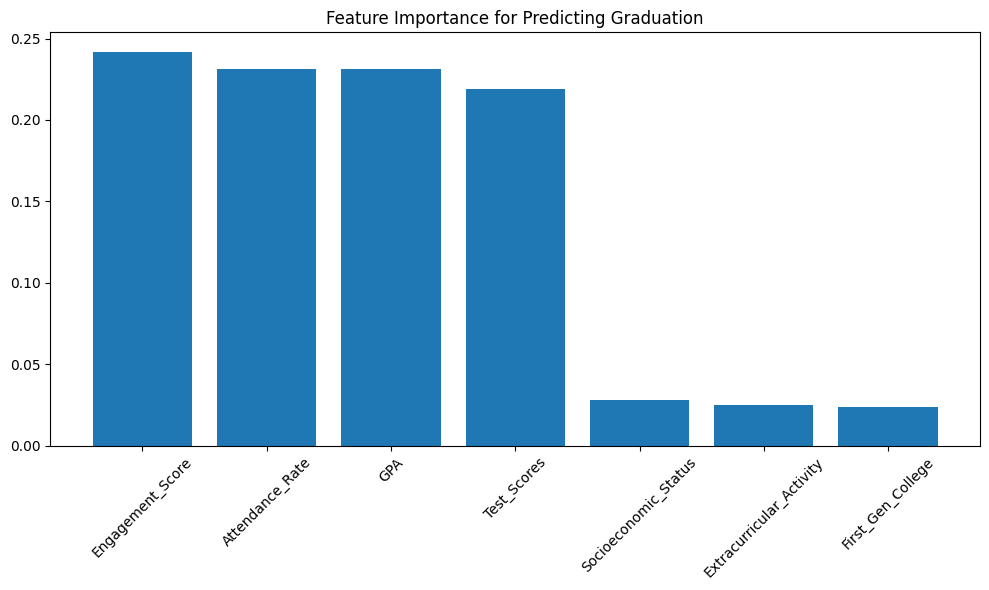

In [14]:
importances_grad = model_grad.feature_importances_
sorted_indices_grad = np.argsort(importances_grad)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Predicting Graduation")
plt.bar(range(len(importances_grad)), importances_grad[sorted_indices_grad], align="center")
plt.xticks(range(len(importances_grad)), [features[i] for i in sorted_indices_grad], rotation=45)
plt.tight_layout()
plt.show()